### Sri Handini
### 20110019
### S1-SD01-A

# No. 4 - KNN

dataset yang digunakan adalah menunjukan daya tarik membeli barang A berdasar pada kelamin, usia, dan estimasi gaji

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
from sklearn import neighbors

In [2]:
df = pd.read_csv('iklan_sosmed.csv')
df.head()

,User ID,Kelamin,Usia,EstimasiGaji,Beli
0,15624510,Laki,19,19000,0
1,15810944,Laki,35,20000,0
2,15668575,Perempuan,26,43000,0
3,15603246,Perempuan,27,57000,0
4,15804002,Laki,19,76000,0


#### Mengubah tipe data string menjadi integer

In [3]:
data = df.copy()


In [4]:
a = {'Laki': 0, 'Perempuan': 1}
data.Kelamin = [a[item] for item in data.Kelamin.astype(str)]

#### Split Data

In [5]:
feature_columns = ['Kelamin','Usia','EstimasiGaji']
X = data[feature_columns].values
y = data['Beli'].values


In [7]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Visualisasi

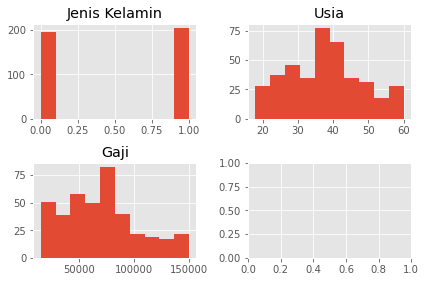

In [8]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(data['Kelamin'], bins = n_bins);
axs[0,0].set_title('Jenis Kelamin');
axs[0,1].hist(data['Usia'], bins = n_bins);
axs[0,1].set_title('Usia');
axs[1,0].hist(data['EstimasiGaji'], bins = n_bins);
axs[1,0].set_title('Gaji');
axs[1,1].hist(data['Beli'], bins = n_bins);
axs[1,1].set_title('Beli');

'Kelamin','Usia','EstimasiGaji','Beli'

#Add some spacing
fig.tight_layout(pad=1.0);

## KNN

#### Melalukan pengujian dengan rentang nilai K dari 1 - 50

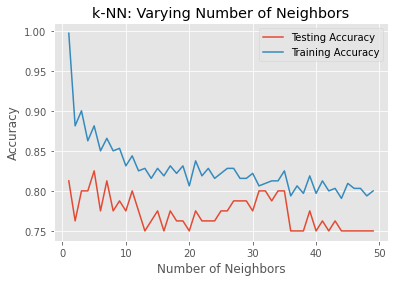

In [15]:
no_neighbors = np.arange(1, 50)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Kesimpulan

#### Dari percobaan nilai K di dapatkan score accuracy yang paling tinggi di bawah 85% dengan nilai K = 5

In [13]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 5) 
knn_model_5 = knn.fit(X_train, y_train)
knn_result_5 = knn_model_5.score(X_test, y_test)
print('K-NN accuracy for test set : %f' % knn_result_5)

K-NN accuracy for test set : 0.825000


In [16]:
from sklearn.metrics import classification_report
y_true, y_pred  = y_test, knn_model_5.predict(X_test)
print(classification_report(y_true, y_pred ))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        52
           1       0.77      0.71      0.74        28

    accuracy                           0.82        80
   macro avg       0.81      0.80      0.80        80
weighted avg       0.82      0.82      0.82        80



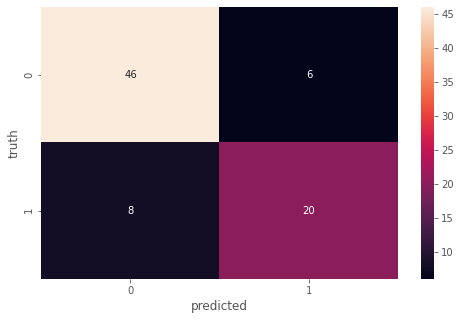

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, roc_curve
from sklearn.metrics import confusion_matrix

f, ax = plt.subplots(figsize=(8,5))
y_true, y_pred = y_test, knn_model_5.predict(X_test)
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.show()

#### Nilai akurasi pada saat K = 5, yaitu sebesar 82%
#### lalu di lakukan evaluasi dengan confussion matrix. Didapatkan hasil bahwa  pada label 1 berhasil memprediksi dengan benar sebanyak 20 label. pada label 2 berhasil memprediksi dengan benar sebanyak 46 label.

# NO. 5 Naive Bayes

In [4]:
from sklearn.linear_model import LinearRegression

#### akan dilakukan pengujian linear regression sederhana 
#### rumusnya : Y = a + bX

#### 1. Menentukan variabel X dan Y
#### variabel X (independen) : engine size
#### variabel Y (dependen) : Price

In [3]:
dataset = pd.read_csv('car.csv')
dataset.head()

,engine size,price
0,130,13495
1,130,16500
2,152,16500
3,109,13950
4,136,17450


#### Split data

In [5]:
x = dataset.drop(['price'], axis=1)

y = dataset['price']

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#### buat object linearegresion

In [7]:
linearegresion = LinearRegression()
linearegresion.fit(x_train, y_train)
print(linearegresion.coef_)
print(linearegresion.intercept_)

[162.32926503]
-7513.9504274815445


#### akurasi

In [8]:
linearegresion.score(x_test, y_test)

0.7775197477684599

Text(0.5, 1.0, 'Plot Engine Size vs Price')

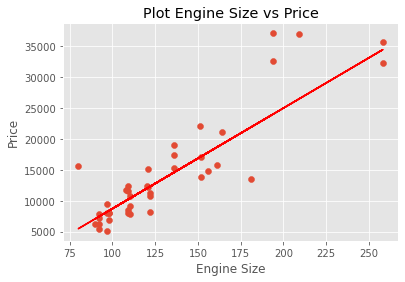

In [9]:
y_prediksi = linearegresion.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Plot Engine Size vs Price')

#### 2. Hubungan sebab akibat
#### NIlai akurasi yang didapat adalah 77% atau 0,77 
#### karena nilainya mendekati 1 dapat diartikan bahwa hubugan antara engine size dan price dapat dikatakan kuat positif.